In [1]:
import pandas as pd
from utils.data_types import *
from utils.data_helper import *

machines: list[Machine] = get_data_from_excel("machines")
work_types: list[WorkType] = get_data_from_excel("work types")
supplier_orders: list[SupplierOrder] = get_data_from_excel("supplier order")
customer_deadlines: list[CustomerDeadline] = get_data_from_excel("customer order")

In [2]:
from utils.algorithms import *

solution = Solution(
    machines,
    work_types,
    supplier_orders,
    customer_deadlines,
)

solution.constructive_solution()

works to do: 5
 works to do: [{'id': 'W0', 'quantity_to_work': 50, 'time_machine_needed': 40}, {'id': 'W1', 'quantity_to_work': 95, 'time_machine_needed': 40}, {'id': 'W2', 'quantity_to_work': 40, 'time_machine_needed': 10}, {'id': 'W3', 'quantity_to_work': 55, 'time_machine_needed': 30}, {'id': 'W4', 'quantity_to_work': 70, 'time_machine_needed': 40}]
works to do: 5
 works to do: [{'id': 'W0', 'quantity_to_work': 50, 'time_machine_needed': 40}, {'id': 'W1', 'quantity_to_work': 58, 'time_machine_needed': 40}, {'id': 'W2', 'quantity_to_work': 40, 'time_machine_needed': 10}, {'id': 'W3', 'quantity_to_work': 18, 'time_machine_needed': 30}, {'id': 'W4', 'quantity_to_work': 33, 'time_machine_needed': 40}]
works to do: 5
 works to do: [{'id': 'W0', 'quantity_to_work': 4, 'time_machine_needed': 40}, {'id': 'W1', 'quantity_to_work': 12, 'time_machine_needed': 40}, {'id': 'W2', 'quantity_to_work': 40, 'time_machine_needed': 10}, {'id': 'W3', 'quantity_to_work': 18, 'time_machine_needed': 30}, {

In [3]:
for schedule_machine in solution.schedule:
    print(f"Macchina {schedule_machine.machine}")
    for i_j, job in enumerate(schedule_machine.list_jobs):
        print(f"Job {i_j}")
        print(
            f"Lista lavorazioni: {[(w['id'],w['time_machine_needed']) for w in job.list_works]}"
        )
        print(
            f"Cicli di produzione {job.worked_quantity} e prodotti {job.worked_quantity*len(job.list_works)} elementi ({len(job.list_works)} alla volta)"
        )
        print(
            f"Tempo di produzione {job.time_needed()} minuti ({job.time_needed()/DAILY_WORKING_MINUTES} giorni)"
        )
        print("\n")


print(solution.schedule[3].list_jobs[0].list_works)

Macchina {'name': 'M1', 'pallets': 1}
Job 0
Lista lavorazioni: [('W2', 10)]
Cicli di produzione 40 e prodotti 40 elementi (1 alla volta)
Tempo di produzione 2400 minuti (4.0 giorni)


Job 1
Lista lavorazioni: [('W3', 30)]
Cicli di produzione 18 e prodotti 18 elementi (1 alla volta)
Tempo di produzione 1440 minuti (2.4 giorni)


Job 2
Lista lavorazioni: [('W0', 40)]
Cicli di produzione 4 e prodotti 4 elementi (1 alla volta)
Tempo di produzione 360 minuti (0.6 giorni)


Macchina {'name': 'M2', 'pallets': 1}
Job 0
Lista lavorazioni: [('W4', 40)]
Cicli di produzione 33 e prodotti 33 elementi (1 alla volta)
Tempo di produzione 2970 minuti (4.95 giorni)


Job 1
Lista lavorazioni: [('W1', 40)]
Cicli di produzione 12 e prodotti 12 elementi (1 alla volta)
Tempo di produzione 1080 minuti (1.8 giorni)


Macchina {'name': 'M3', 'pallets': 2}
Job 0
Lista lavorazioni: [('W1', 40), ('W0', 40)]
Cicli di produzione 46 e prodotti 92 elementi (2 alla volta)
Tempo di produzione 5980 minuti (9.966666666666

In [6]:
schedule_machines: list[ScheduleMachine] = solution.schedule
name_machines = [
    f"{s.machine['name']} {s.machine['pallets']} pallets" for s in schedule_machines
]
list_data = [
    [
        {
            "job": i_job,
            "work_in_parallel": len(j.list_works),
            "work_type": w["id"],
            "time_machine_needed": w["time_machine_needed"],
            "quantity_to_produce": j.worked_quantity,
            "total_time_machine_needed": j.time_needed(),
            "days_machine_needed": j.time_needed() / DAILY_WORKING_MINUTES,
        }
        for i_job, j in enumerate(s.list_jobs)
        for w in j.list_works
    ]
    for s in schedule_machines
]

write_data_to_excel(list_data, name_machines, "Data/schedule.xlsx")

In [12]:
inventory = solution.inventory
print(inventory.inventory_rows)
print(inventory.customer_deadlines)

[{'id': 'W0', 'time_machine_needed': 40, 'worked_quantity': 50}, {'id': 'W1', 'time_machine_needed': 40, 'worked_quantity': 95}, {'id': 'W2', 'time_machine_needed': 10, 'worked_quantity': 40}, {'id': 'W3', 'time_machine_needed': 30, 'worked_quantity': 55}, {'id': 'W4', 'time_machine_needed': 40, 'worked_quantity': 70}]
[{'id_work_type': 'W0', 'quantity': 50}, {'id_work_type': 'W1', 'quantity': 95}, {'id_work_type': 'W2', 'quantity': 40}, {'id_work_type': 'W3', 'quantity': 55}, {'id_work_type': 'W4', 'quantity': 70}]


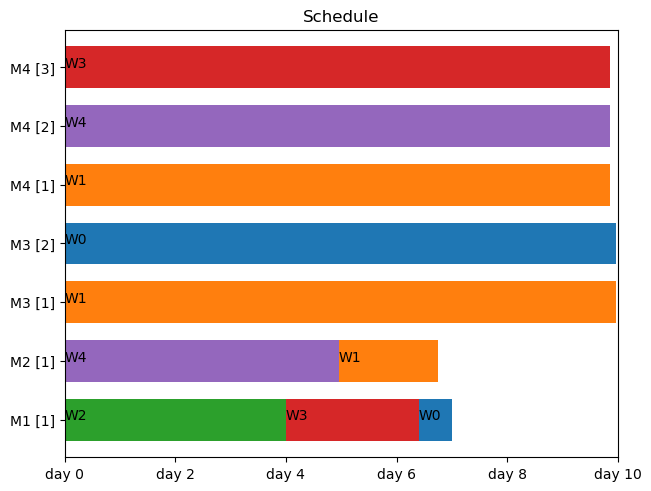

In [8]:
from utils.plot_helper import draw_gantt_chart

draw_gantt_chart(solution.schedule)